# CardioML



Elaborato di Programmazione di Applicazioni Data Intensive - 2023

Membri del Gruppo:
- Matteo Iorio
- Fabio Vincenzi
- Stefano Furi

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks")
sns.set_style("whitegrid")

## Creazione del DataFrame

Ci siamo posti l'obbiettivo di realizzare un progetto che **possa veramente risultare utile** per alcuni professionisti del settore. Quello che andremo a studiare è un problema che riguarda i fanciulli di tenera età, più in particolare andremo ad analizzare i *risultati di rilevazioni cardiache*, andando a determinare se avranno o meno complicanze cardiache patologiche. 

Il dataset utilizzato riguarda una serie di misurazioni effettuate attraverso [cardiotocografia](https://it.wikipedia.org/wiki/Cardiotocografia), consultabile presso [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/cardiotocography#).


## Preparazione del dataset

In [83]:
raw_df = pd.read_csv("https://raw.githubusercontent.com/S-furi/CardioML/main/data/ctg.csv?token=GHSAT0AAAAAAB2INSX3OMMLZ7L45MTIRBW2ZEB3QJQ", delimiter=';')

In [84]:
raw_df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,01/12/96,CTG0001.txt,240,357,120,120,0,0,0,...,0,0,0,0,0,0,1,0,9,2
1,Fmcs_1.txt,03/05/96,CTG0002.txt,5,632,132,132,4,0,4,...,0,0,0,1,0,0,0,0,6,1
2,Fmcs_1.txt,03/05/96,CTG0003.txt,177,779,133,133,2,0,5,...,0,0,0,1,0,0,0,0,6,1
3,Fmcs_1.txt,03/05/96,CTG0004.txt,411,1192,134,134,2,0,6,...,0,0,0,1,0,0,0,0,6,1
4,Fmcs_1.txt,03/05/96,CTG0005.txt,533,1147,132,132,4,0,5,...,0,0,0,0,0,0,0,0,2,1


Alcune variabili categoriche sono state mappate a `np.float64`, mentre altre sarebbe stato sufficiente un tipo `np.int32`. Possiamo quindi ricaricare il dataset, specificando il tipo di dato per ogni colonna, facendo anche riferimento all'utilizzo di memoria

In [85]:
raw_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   FileName  2126 non-null   object
 1   Date      2126 non-null   object
 2   SegFile   2126 non-null   object
 3   b         2126 non-null   int64 
 4   e         2126 non-null   int64 
 5   LBE       2126 non-null   int64 
 6   LB        2126 non-null   int64 
 7   AC        2126 non-null   int64 
 8   FM        2126 non-null   int64 
 9   UC        2126 non-null   int64 
 10  ASTV      2126 non-null   int64 
 11  MSTV      2126 non-null   object
 12  ALTV      2126 non-null   int64 
 13  MLTV      2126 non-null   object
 14  DL        2126 non-null   int64 
 15  DS        2126 non-null   int64 
 16  DP        2126 non-null   int64 
 17  DR        2126 non-null   int64 
 18  Width     2126 non-null   int64 
 19  Min       2126 non-null   int64 
 20  Max       2126 non-null   int64 
 21  Nmax      2126

Possiamo poi procedere con la classificazione dei nostro dati, più nello specifico abbiamo individuato 3 macro classi:
* *bool_vars*: Tutte le variabili del nostro data frame che assumono valori tra [0, 1], andremo ad assegnare come tipologia di valore quello *booleano*
* *cat_varts*: All'interno di questa tipologia di variabili, troviamo quelle *categoriche*, assegneremo a tali variabili il valore *category*
* *num_vars*: In quest'ultima tipologia di variabili, abbiamo solamente le tipologie di valori *numerici*, le quali verranno trattate come variabili di tipo *float32*

Queste classi, oltre ad essere utili per motivi di training dei modelli, risultano utili per poter caricare efficientemente il *dataframe* in memoria.

In [86]:
bool_vars = [
    "A", "B", "C", "D", "SH",
    "AD", "DE", "LD", "FS", "SUSP"
]

cat_vars = ["CLASS", "NSP", "Tendency"]

num_vars = [
    "b", "e", "LBE", "LB", "AC",
    "FM", "UC", "ASTV",
    "MSTV", "ALTV", "MLTV", "DL",
    "DS", "DP", "DR", "Width", "Min",
    "Max", "Nmax", "Nzeros", "Mode",
    "Mean", "Median", "Variance"
]

custom_dtpes = { 
    **{ col: "bool" for col in bool_vars }, 
    **{ col: "category" for col in cat_vars},
    **{ col: "float32" for col in num_vars}
}

Possiamo quindi procedere a leggere nuovamente il Data Frame, specificando i tipi delle colonne.

In [87]:
raw_df = pd.read_csv("https://raw.githubusercontent.com/S-furi/CardioML/main/data/ctg.csv", delimiter=';', dtype=custom_dtpes, decimal=',')

In [88]:
raw_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   FileName  2126 non-null   object  
 1   Date      2126 non-null   object  
 2   SegFile   2126 non-null   object  
 3   b         2126 non-null   float32 
 4   e         2126 non-null   float32 
 5   LBE       2126 non-null   float32 
 6   LB        2126 non-null   float32 
 7   AC        2126 non-null   float32 
 8   FM        2126 non-null   float32 
 9   UC        2126 non-null   float32 
 10  ASTV      2126 non-null   float32 
 11  MSTV      2126 non-null   float32 
 12  ALTV      2126 non-null   float32 
 13  MLTV      2126 non-null   float32 
 14  DL        2126 non-null   float32 
 15  DS        2126 non-null   float32 
 16  DP        2126 non-null   float32 
 17  DR        2126 non-null   float32 
 18  Width     2126 non-null   float32 
 19  Min       2126 non-null   float32 
 20  Max     

In questo modo, abbiamo ridotto di quasi la metà la quantità di memoria utilizzata per mantenere il dataset.

I nomi utilizzati nel dataset non risultano molto esplicativi, perciò mappiamo i nomi di aclune colonne in nomi più esplicativi.

In [89]:
col_names = {
    "FileName": "file_name",
    "Date": "date",
    "SegFile": "seg_file",
    "b": "start_instant",
    "e": "end_instant",
    "LBE": "medical_baseline",
    "LB": "sisproto_baseline",
    "AC": "heart_acc",
    "FM": "foetal_move",
    "UC": "utherine_contract",
    "ASTV": "pct_short_variability",
    "MSTV": "mean_short_variability",
    "ALTV": "pct_long_variability",
    "MLTV": "mean_long_variability",
    "DL": "light_dec",
    "DS": "severe_dec",
    "DP": "prolongued_dec",
    "DR": "repetitive_dec",
    "A": "calm_sleep",
    "B": "rem_sleep",
    "C": "calm_vigilance",
    "D": "active_vigilance",
    "AD": "acc_pattern_stress", # negativo se pattern in decelerazione
    "DE": "dec_pattern_vagal",
    "LD": "largely_dec",
    "FS": "patho_flat_sinusoidal",
    "SUSP": "suspect"
}


*   **file_name**: Nome del file che contiene i dati della cardiotografia. È un identificatore unico per il file.
*   **date**: Data relativa alla registrazione della cardiotografia. Indica la data in cui è stato eseguito l'esame.
*   **seg_file**: Nome del file di segmentazione associato ai dati della 
cardiotografia. Può contenere informazioni sulla suddivisione temporale dei dati.
*   **start_instant**: Istante di inizio della registrazione della cardiotografia. Indica il momento in cui i dati sono stati registrati.
* **end_instant**: Istante di fine della registrazione della cardiotografia. Indica il momento finale in cui i dati sono stati registrati.
*   **medical_baseline**: Baseline medica, rappresenta la linea di base dei segnali registrati durante l'esame.
*   **sisproto_baseline**: Baseline di riferimento, rappresenta una linea di base standard usata per confrontare i segnali registrati.
*   **heart_acc**: Accelerazioni cardiache, misura le variazioni di frequenza cardiaca che indicano l'accelerazione del cuore.
*   **foetal_move**: Movimenti fetali, rappresenta l'attività motoria del feto durante la registrazione.
*   **utherine_contract**: Contrazioni uterine, indica le contrazioni dell'utero durante la registrazione.
*   **pct_short_variability**: Variabilità a breve termine della frequenza cardiaca fetale espressa in percentuale.
*   **mean_short_variability**: Media della variabilità a breve termine della frequenza cardiaca fetale.
*   **pct_long_variability**: Variabilità a lungo termine della frequenza cardiaca fetale espressa in percentuale.
*   **mean_long_variability**: Media della variabilità a lungo termine della frequenza cardiaca fetale.
*   **light_dec**: Decelerazioni lievi, rappresenta la diminuzione temporanea della frequenza cardiaca fetale in modo lieve.
*   **severe_dec**: Decelerazioni gravi, indica la diminuzione temporanea della frequenza cardiaca fetale in modo significativo.
*   **prolongued_dec**: Decelerazioni prolungate, rappresenta la diminuzione prolungata della frequenza cardiaca fetale.
*   **repetitive_dec**: Decelerazioni ripetitive, indica la presenza di decelerazioni che si ripetono durante la registrazione.
*   **calm_sleep**: Stato di sonno tranquillo del feto durante la registrazione.
*   **rem_sleep**: Stato di sonno REM (Rapid Eye Movement) del feto durante la registrazione.
*   **calm_vigilance**: Stato di veglia tranquilla del feto durante la registrazione.
*   **active_vigilance**: Stato di veglia attiva del feto durante la registrazione.
*   **acc_pattern_stress**: Pattern di accelerazione legato allo stress. Assume un valore negativo se è presente un pattern di decelerazione.
*  **width**: rappresenta la durata delle onde nell'attività cardiaca fetale registrata.
* **variance** è una misura statistica che rappresenta la dispersione dei dati intorno alla media.


In [90]:
bool_vars_low = [
    "calm_sleep", "rem_sleep", "calm_vigilance", "active_vigilance",
    "acc_pattern_stress", "dec_pattern_vagal", "largely_dec", "patho_flat_sinusoidal", "suspect"
]

cat_vars_low = [
    "nsp", "tendency"
]

num_vars_low = [
    "medical_baseline", "heart_acc", "foetal_move", "utherine_contract",
    "pct_short_variability", "mean_short_variability", "pct_long_variability",
    "mean_long_variability", "light_dec", "severe_dec", "prolongued_dec",
    "repetitive_dec", "width", "min", "max", "nmax", "nzeros", "mode","mean",
    "median", "variance"
]

In [91]:
raw_df.rename(columns=col_names, inplace=True)
raw_df.columns = raw_df.columns.str.lower()
raw_df.columns

Index(['file_name', 'date', 'seg_file', 'start_instant', 'end_instant',
       'medical_baseline', 'sisproto_baseline', 'heart_acc', 'foetal_move',
       'utherine_contract', 'pct_short_variability', 'mean_short_variability',
       'pct_long_variability', 'mean_long_variability', 'light_dec',
       'severe_dec', 'prolongued_dec', 'repetitive_dec', 'width', 'min', 'max',
       'nmax', 'nzeros', 'mode', 'mean', 'median', 'variance', 'tendency',
       'calm_sleep', 'rem_sleep', 'calm_vigilance', 'active_vigilance', 'e',
       'acc_pattern_stress', 'dec_pattern_vagal', 'largely_dec',
       'patho_flat_sinusoidal', 'suspect', 'class', 'nsp'],
      dtype='object')

Otteniamo quindi un dataset con le colonne ben formattate

Ai fini dello scopo di questo progetto, le colonne `file_name`, `seg_file` e `date` non risultano particolarmente utili per la creazione di modelli predittivi. Inoltre, la variabile `class` indica quale tra le variabili booleane è attiva. Infine, rimuoviamo `sisproto_baseline` in quanto risulta, per ogni record, uguale a `medical_baseline`.

In [92]:
df = raw_df.drop(columns=['file_name', 'date', 'seg_file', 'class', 'sisproto_baseline'])

Possiamo aggiungere delle nuove features al dataset per descrivere fenomeni di maggior interesse, o per riassumere eventi durante la cardiotocografia.

Aggiungiamo:
- `contract_move_ratio` come il rapporto tra contrazione uterine (madre) e movimenti fetali. Questo può darci un indicatore di come ad una azione della madre, possa corrispondere una reazione del feto, e in quale misura.
- `variability_diff` come il rapporto tra la percentuale di variabilità a lungo termine e la percentuale di variabilità a breve termine. Questo ci può permettere di legare le due variabilità fornendo un indicatore uniforme per tutti i record.
- `dec_duration_ratio` come il rapporto tra la durata totale della rilevazione (`end_instant - start_instant`) e il numero di decelerazioni proloungate per secondo.

Inoltre creiamo una nuova feature derivata `duration`, in modo tale da poter eliminare le colonne `start_instant` ed `end_instant`, affiché i modelli possano basarsi sul tempo come misura assoluta.

In [93]:
df['contract_move_ratio'] = \
    (df['utherine_contract'] / df['foetal_move']).fillna(0).replace([np.inf, -np.inf], 0)

df['variability_diff'] = df['pct_long_variability'] / df['pct_short_variability'].fillna(0)

df['duration'] = (df['end_instant'] - df['start_instant'])

df['dec_duration_ratio'] = \
    (df['duration'] / df['prolongued_dec']).fillna(0).replace([np.inf, -np.inf], 0)

df.drop(columns=['start_instant', 'end_instant'], inplace=True) 

num_vars_low.extend(['contract_move_ratio', 'variability_diff', 'dec_duration_ratio', 'duration'])

Il dataset è ora utilizzabile per procedere con l'analisi esplorativa.

## Analisi Esplorativa

Possiamo rapidamente vedere quali variabili del dataset hanno correlazione maggiore, per poter poi comprendere come effettivamente alcuni valori possano influenzare altri. Utilizziamo quindi l'indice di correlazione di Pearson.

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

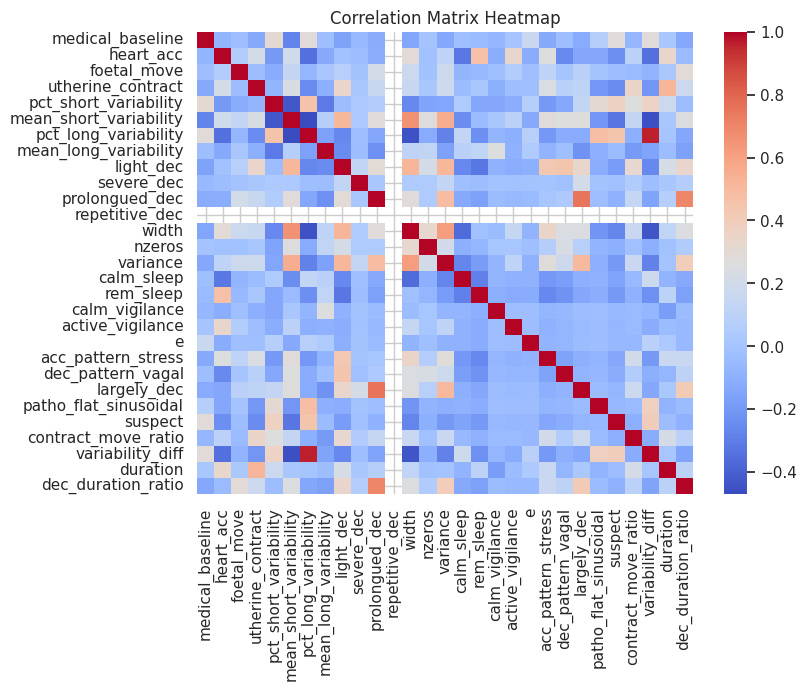

In [94]:
corr_matrix = df.drop(columns=['min', 'mean', 'max','nmax', 'mode', 'median']) \
    .corr(method="pearson")

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")

La *heatmap* mostra come alcune variabili vengano influenzate tra di loro (correlazione). 
È importante notare come la correlazione non implichi sempre relazioni di causa-effetto, ma piusttosto come due variabili possano verificarsi insieme o influenzarsi reciprocamente. 


**largely_dec** e **prolongued_dec**: correlazione di 0.7578
Notiamo una relazione positiva tra la diminuzione significativa (largely_dec) e la diminuzione prolungata (prolongued_dec). Questa relazione può essere di particolare interesse nella valutazione della salute fetale, poiché una diminuzione significativa prolungata potrebbe essere associata a condizioni di stress o anomalie nel tracciato cardiografico.

**width** e **mean_short_variability**: correlazione di 0.6608
Questa correlazione moderatamente alta suggerisce una relazione positiva tra la larghezza (width) e la variabilità media a breve termine (mean_short_variability). Ciò potrebbe essere interessante da un punto di vista clinico, poiché un aumento della larghezza potrebbe essere associato a una maggiore variabilità nelle misurazioni cardiografiche a breve termine.

**variance** e **mean_short_variability**: correlazione di 0.5559
Questa correlazione moderata indica una relazione positiva tra la varianza (variance) e la variabilità media a breve termine (mean_short_variability). Ciò suggerisce che un aumento della varianza potrebbe essere associato a un aumento della variabilità nelle misurazioni cardiografiche a breve termine.

In [95]:
df.groupby('nsp').describe(include=[np.number])

medical_baseline                                                           \
               count        mean       std    min    25%    50%    75%    max   
nsp                                                                             
1             1655.0  131.981873  9.454514  106.0  125.0  132.0  138.0  160.0   
2              295.0  141.684738  7.889044  120.0  137.0  143.0  147.0  159.0   
3              176.0  131.687500  9.433016  110.0  128.0  132.0  134.0  152.0   

    heart_acc            ... duration         dec_duration_ratio              \
        count      mean  ...      75%     max              count        mean   
nsp                      ...                                                   
1      1655.0  3.424169  ...  1041.50  3599.0             1655.0   37.319035   
2       295.0  0.213559  ...  1098.50  3599.0              295.0   34.519775   
3       176.0  0.329545  ...   966.75  1709.0              176.0  258.331451   

                                                           
            std  min  25%         50%         75%     max  
nsp                                                        
1    186.138885  0.0  0.0    0.000000    0.000000  1435.0  
2    161.937653  0.0  0.0    0.000000    0.000000  1199.0  
3    276.892548  0.0  0.0  257.166672  460.708336  1040.0  

[3 rows x 208 columns]

La tabella fornisce una panoramica delle statistiche descrittive per la variabile "nsp" suddivisa nelle categorie 
1. normal
2. suspect
3. pathological 

Si osserva uno sbilanciamento significativo tra le categorie, con un numero maggiore di istanze nella categoria "normal". 
La categoria "suspect" presenta la deviazione standard più alta, pari a circa 656.53, seguita dalla categoria "pathological" con una deviazione standard di circa 866.54 e dalla categoria "normal" con una deviazione standard di circa 915.02. Ciò indica una maggiore variabilità dei valori nella categoria "suspect" rispetto alle altre due categorie. La presenza di valori massimi più elevati nella categoria "normal" suggerisce la presenza di alcuni casi estremi. Nel complesso, la tabella evidenzia la distribuzione e le caratteristiche delle categorie di risultato nel dataset.

([<matplotlib.patches.Wedge at 0x7f3afc1b2440>,
 [Text(-0.8441562311892146, 0.7052660897451555, 'normal'),
  Text(0.6344062353380878, -0.8986260226390926, 'suspect'),
  Text(1.0630076905865578, -0.28286860863983, 'pathological')],
 [Text(-0.4604488533759351, 0.38469059440644837, '78%'),
  Text(0.3460397647298661, -0.4901596487122323, '14%'),
  Text(0.5798223766835768, -0.15429196834899814, '8%')])

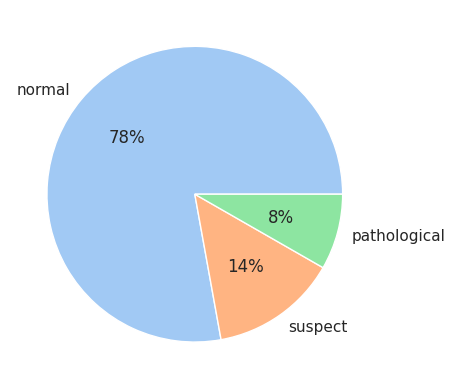

In [96]:
keys = ['normal', 'suspect', 'pathological']
palette_color = sns.color_palette('pastel')
plt.pie(df['nsp'].value_counts(), labels=keys, colors=palette_color, autopct='%.0f%%')

Come si può notare dal grafico a torta, la variabile target "nsp" risulta sbilanciata. Ciò significa che il numero di istanze per le tre classi non è bilanciato.
Per affrontare questo problema, utilizzeremo tecniche di bilanciamento delle classi al fine di ottenere una distribuzione più equilibrata tra le varie variabili.

nsp
1    Axes(0.22375,0.11;0.5775x0.77)
2    Axes(0.22375,0.11;0.5775x0.77)
3    Axes(0.22375,0.11;0.5775x0.77)
Name: heart_acc, dtype: object

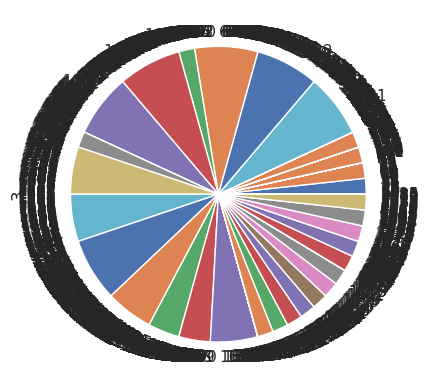

In [97]:
df.groupby('nsp')["heart_acc"].plot.pie()

Come si può notare dalla heatmap, esiste una una forte correlazione tra la variabile `width` e `mean_short_variability`, pari a:

In [98]:
corr_matrix['width']['mean_short_variability']

0.6608467767745067

<Axes: xlabel='width', ylabel='mean_short_variability'>

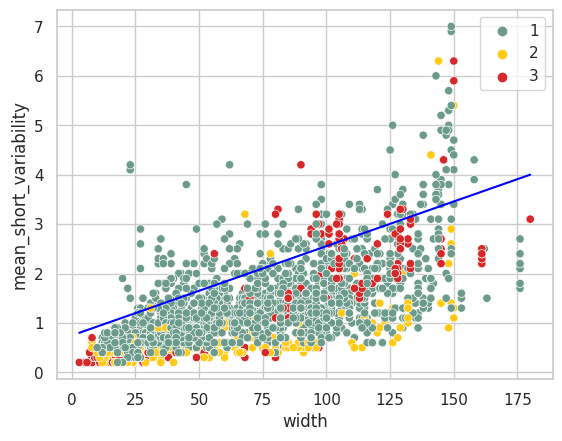

In [99]:
scatter_plot = sns.scatterplot(data=df, x='width', y='mean_short_variability', \
                               hue='nsp', palette=['#6c9a8b', '#ffc914', '#d62828'])

sns.lineplot(x=[df['width'].min(), df['width'].max()], y=[0.8, 4], color='blue')

Da come si può vedere in questo grafico vi è una piccola regione in cui sono condensati una grande quantità di casi **patologici**, quando si ha il *mean_short_variability* compreso tra 1.70 e 3 e la *width* compresa tra 80 e 130 circa, mentre una grande distribuzione di valori etichettati come *normali* si trovano al di sotto della linea blu, quando i valori di "**mean_short_variability**" sono compreso tra 0 e 2.5 mentre i valori di **"width"** sono compresi tra 0 e 100 circa.

Possiamo individuare una associazione moderata tra `mean_short_variability` e `variance`, in particolare il loro indice di correlazione è pari a:

In [100]:
corr_matrix['mean_short_variability']['variance']

0.5558524410341099

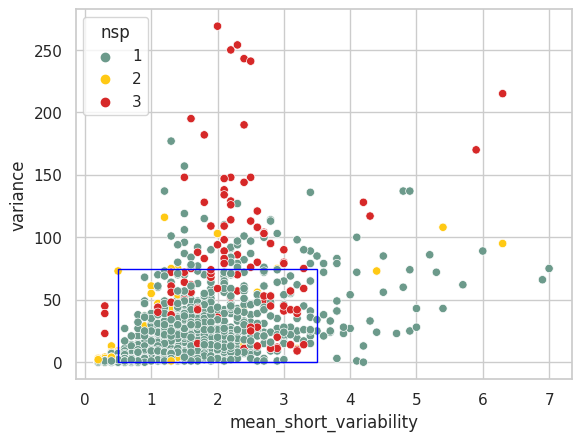

In [101]:
sns.scatterplot(data=df, x='mean_short_variability', y='variance', hue='nsp', palette=['#6c9a8b', '#ffc914', '#d62828'])
rect = plt.Rectangle((0.5, 0), 3, 75, fill=False, color='blue')
plt.gca().add_patch(rect)


Sono comuni valori di **variance** compresi tra 50 e 150 e valori di **mean_short_variability** compresi tra 1 e 3 ad indicare casi "patologici", mentre un'elevata concentrazione di valori etichettati come "normale", è racchiusa nei valori di **y** che stanno tra 0 e 75 e nei valori di **x** che oscillano tra 0.5 e 3.5 circa, come si può vedere dal grafico sovrastante la maggior parte dei valori etichettati come *normale* sono racchiusi all'interno del rettangolo blu. 


È interessante notare anche l'apparente forte correlazione tra `largely_dec` e `prolongued_dec`, pari a:

In [102]:
corr_matrix['largely_dec']['prolongued_dec']

0.7577662756421346

Possiamo quindi effettuare un grafico per visualizzare la distribuzione dei valori (diagonale) e come si presenta l'output di `NSP` in base alla distribuzione dei due valori

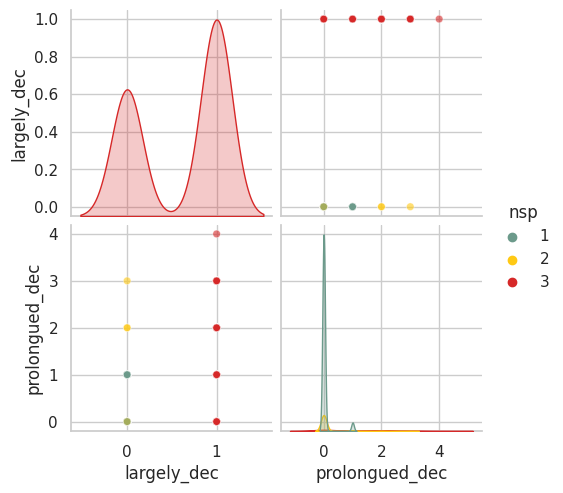

In [103]:
sns.pairplot(data=df, vars=['largely_dec', 'prolongued_dec'], hue='nsp',
             palette=['#6c9a8b', '#ffc914', '#d62828'],
             diag_kind="kde", plot_kws={'alpha': 0.6, 's': 30})

Per quanto le variabili risultano piuttosto correlate, questo potrebbe non indicare una diretta relazione di cause-effetto tra le due variabili. In particolare, essendo entrambe misure ricavate da momenti di decelerazione, la loro forte correlazione può piuttosto indicare come queste variabili possano verificarsi durante lo stesso fenomeno.

È però degno di nota come la variabile `NSP` sia sul livello di *pathological* quando la variabile booleana `largely_dec` sia impostata a 1, per ogni valore di `prolongued_dec`, mentre quando a 0, si può notare per valori superiori a 2 di `prolongued_dec` un comportamento sospetto. Per meglio visualizzare i dati, si consideri il seguente istogramma.

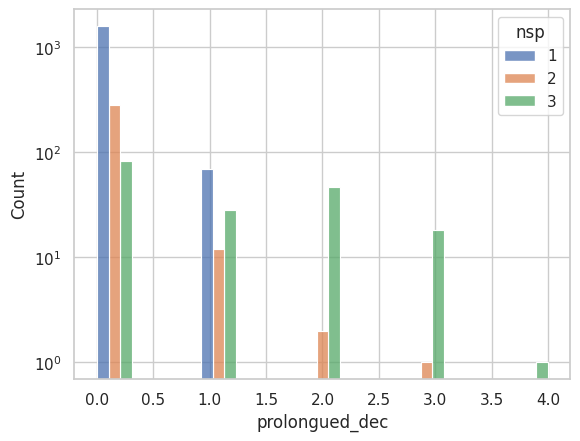

In [172]:
sns.histplot(data=df, x='prolongued_dec', hue='nsp', multiple='dodge')
plt.yscale('log')

## Modelli predittivi

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

Root Mean Squared Percentage Error, è una formula che ci permette di capire quanto il nostro albero di regressione è accurato, **più il valore è basso e più il nostro modello sarà ottima**, questa funzione verrà poi utilizzata nel metodo successivo per valutare il modello che abbiamo addestrato. 

In [105]:
def rmspe(y_real, y_pred):
    return np.sqrt(np.mean((y_pred /y_real - 1) ** 2))

Ora che abbiamo definito RMSPE, possiamo realizzare la funzione `print_eval`, la quale ci permetterà di capire quanto il nostro modello è accurato rispetto ai dati X ed y di input. 

In [106]:
def print_eval(X, y, model):
    y_pred = model.predict(X)
    print(f"      MSE: {mean_squared_error(y, y_pred):12.4f}")
    print(f"R-squared: {r2_score(y, y_pred):12.4f}")
    print(f"    RMSPE: {rmspe(y, y_pred):12.4f}")

Definiamo ora una nuova funzione che ci permetterà di addestrare il modello attraverso i dati passati in input:
*  *X_train*
*  *y_train*
*  *X_test*
*  *y_test*


Una volta che il nostro modello sarà stato addestrato, andremo subito a verificare la sua correttezza tramite la funzione *print_eval*.

In [107]:
def fit_eval_tree(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    print_eval(X_test, y_test, model=model)

### Modelli di studio
I modelli con la quale andremo a studiare il nostro dataset sono diversi, tra i tanti disponibili abbiamo deciso di utilizzare:
1. *Alberi di regressione*: `RandomForestRegressor`, `DecisionTreeRegressor`, `XGBoost` e `GradientBoosting`.
2. *Classificazione multiclasse*: `Perceptron`, `LogisticRegression`   


La scelta di tali modelli nasce dalla struttura del nostro dataset. 

### Alberi di regressione

Prima di iniziare a realizzare i diversi modelli di classificazione, partiamo con il definire una funzione, `boosting_hyperparameters`, che ci permetterà di migliorare il nostro algoritmo. All'interno di questa funzione utilizzeremo la `Grid Search`, in modo da trovare i migliori **iper parametri** da utilizzare e la `StratifiedKFold` per la gestione dei dati di training.

In [108]:
skf = StratifiedKFold(3, shuffle=True, random_state=1926)

def boosting_hyperparameters(classifier, params, X_boosting, y_boosting, name):
  grid_search = GridSearchCV(classifier, params, cv=skf, scoring='accuracy')
  
  grid_model = Pipeline([
      ("std_scaler", StandardScaler()),
      ("grid_search", grid_search)
  ])

  grid_model.fit(X_train if X_boosting is None else X_boosting,\
                  y_train if y_boosting is None else y_boosting)
  #print(f"Grid Search: {grid_search}")
  print(f"             Migliori iperparametri per {name} : {grid_search.best_params_}")
  print(f"Punteggio medio di cross-validation per {name} : {(grid_search.best_score_):12.4f}\n \n")
  return grid_search


Successivamente a ciò, possiamo iniziare a definire i valori che andremo ad utilizzare per addestrare e validare il nostro modello:
1. *X*: E' un data frame, dove all'interno troviamo tutte le colonne, eccetto una, **nsp**
2. *y*: E' una serie, composta dai soli valori di **nsp**

Queste due variabili verranno utilizzate per generare le *variabili di training* e le *variabili di testing*. 

In [109]:
df_dropped = df.drop(columns=["nsp"])
X = df_dropped

In [110]:
X.head(5)

,medical_baseline,heart_acc,foetal_move,utherine_contract,pct_short_variability,mean_short_variability,pct_long_variability,mean_long_variability,light_dec,severe_dec,...,e,acc_pattern_stress,dec_pattern_vagal,largely_dec,patho_flat_sinusoidal,suspect,contract_move_ratio,variability_diff,duration,dec_duration_ratio
0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,0,False,False,False,True,False,0.0,0.589041,117.0,0.0
1,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,0,True,False,False,False,False,0.0,0.000000,627.0,0.0
2,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,0,True,False,False,False,False,0.0,0.000000,602.0,0.0
3,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,0,True,False,False,False,False,0.0,0.000000,781.0,0.0
4,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,0,False,False,False,False,False,0.0,0.000000,614.0,0.0


Un'operazione preliminare che dobbiamo eseguire per lavorare su queste variabili è modificare il tipo dei valori nella variabile *y*, ponendo la tipologia del dato come **intero**, in questo modo potremo calcolare l'accuratezza del modello con le formule viste in precedenza.

In [111]:
y = df["nsp"].astype(int)
y.head(5)

0    2
1    1
2    1
3    1
4    1
Name: nsp, dtype: int64

Una volta che abbiamo definito le nostre due variabili X ed y, possiamo adoperarci della funzione `train_test_split` per suddividere i dataset X e y, in variabili di training e variabili di testing. Da notare che specifichiamo in oltre anche il parametro `stratify`=y, dal momento in cui il nostro dataset è sbilanciato, con questa funzionalità andiamo a distribuire i valori di *y* nelle variabili di training e nelle variabili di test.

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, stratify=y,random_state=1926)

#### Random Forest

Il primo modello che andremo ad utilizzare per lavorare sul nostro dataset è il *Random Forest*.  

In [113]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

Il Random Forest che andremo ad utilizzare è **inizializzato con i seguenti iper parametri**:
1. `max_samples`, specifica la **dimensione del subset di dati di addestramento da utilizzare** per ogni albero all'interno della Random Forest

2. `max_features`,  indica il n**umero massimo di features da considerare durante la ricerca** della migliore suddivisione dei nodi all'interno di ciascun albero della foresta 

3. `n_estimators`, indica il **numero di alberi decisionali che verranno creati** all'interno dell'ensemble.

4. `max_depth`, indica la **massima profondità consentita** per ciascun albero all'interno dell'ensemble

5. `n_jobs`, specifica il **numero di processori da utilizzare** per l'addestramento e la previsione dell'ensemble, in questo caso verranno usati tutti quelli disponibili

In [114]:
rfr = RandomForestRegressor(max_samples=0.2, max_features="sqrt", n_estimators=200, max_depth=None, n_jobs=-1)

Adesso che abbiamo creato il nostro albero, possiamo inizializzare una  `Pipeline`, nella quale metteremo anche uno `StandardScaler` per gestire i parametri numerici.  

In [115]:
randomforest_model = Pipeline([
    ("std_scaler", StandardScaler()),
    ("tree", rfr)
])

Dopo aver inizializzato il nostro *RandomForestRegressor*, passiamo quindi a addestrare e verificare l'accuratezza di questo modello. 

In [116]:
fit_eval_tree(randomforest_model, X_train, y_train, X_test, y_test)

      MSE:       0.0304
R-squared:       0.9195
    RMSPE:       0.1132


Da come si può notare il modello che abbiamo ottenuto ha un errore percentuale del 11% mentre il valore di $R^2$ ha un valore di 0.91.  Controlliamo ora l'importanza di ciascuna feature all'interno dell'albero. 

In [117]:
pd.Series(rfr.feature_importances_, index=X.columns).sort_values(ascending=False)

largely_dec               0.120091
pct_short_variability     0.082707
mean                      0.082338
patho_flat_sinusoidal     0.078413
mean_short_variability    0.070475
median                    0.057809
pct_long_variability      0.054166
mode                      0.051003
suspect                   0.050927
prolongued_dec            0.049272
variability_diff          0.029523
variance                  0.027507
e                         0.027058
heart_acc                 0.025894
dec_duration_ratio        0.022872
utherine_contract         0.021407
calm_sleep                0.021008
width                     0.020526
min                       0.015399
mean_long_variability     0.014656
duration                  0.014629
max                       0.012800
medical_baseline          0.010276
nmax                      0.008302
foetal_move               0.006614
light_dec                 0.004827
rem_sleep                 0.004670
tendency                  0.003433
dec_pattern_vagal   

Dalla serie qui sopra proposta, si può notare che l'elemento più pesato tra i vari parametri, è la colonna *largely_dec*, mentre l'elemento meno pesato è quello di *repetitive_dec*. 

Ora che abbiamo realizzato il nostro albero, possiamo passare alla visualizzazione della sua struttura.

[Text(0.6, 0.875, 'patho_flat_sinusoidal <= 2.638\nsquared_error = 0.313\nsamples = 252\nvalue = 1.233'),
 Text(0.4, 0.625, 'median <= -2.1\nsquared_error = 0.24\nsamples = 245\nvalue = 1.188'),
 Text(0.2, 0.375, 'squared_error = 0.0\nsamples = 4\nvalue = 3.0'),
 Text(0.6, 0.375, 'largely_dec <= 2.045\nsquared_error = 0.194\nsamples = 241\nvalue = 1.162'),
 Text(0.4, 0.125, '\n  (...)  \n'),
 Text(0.8, 0.125, '\n  (...)  \n'),
 Text(0.8, 0.625, 'squared_error = 0.0\nsamples = 7\nvalue = 3.0')]

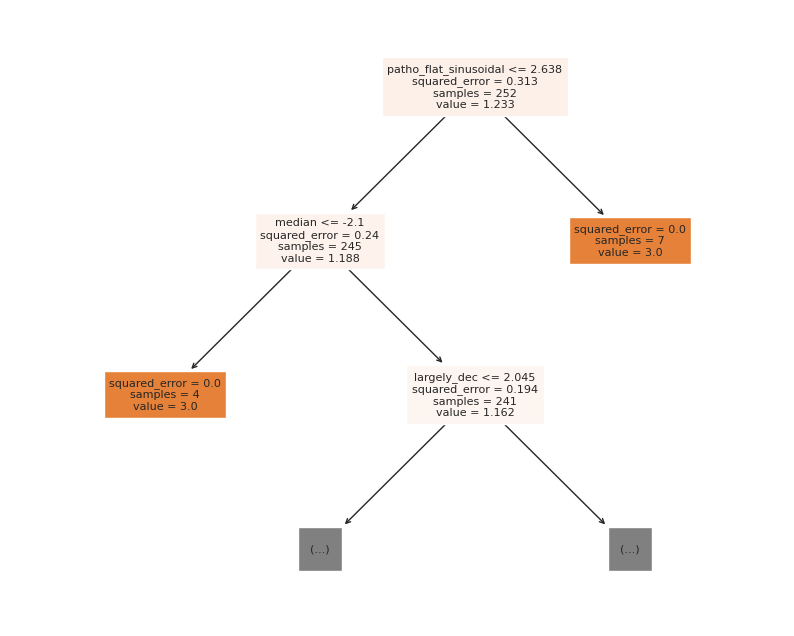

In [118]:
plt.figure(figsize=(10, 8))
plot_tree(rfr.estimators_[0], feature_names=X_train.columns, max_depth=2, filled=True, fontsize=8)

#### Boosting iper parametri

Ora che abbiamo il nostro modello, possiamo provare a migliorarne l'efficienza attraverso un boosting dei suoi *iper parametri*. Più nello specifico andremo a testare i valori:
* `n_estimators`
* `max_depth`
* `min_samples_split`
* `min_samples_leaf`

Il boosting avverrà tramite la nostra funzione **boosting_hyperparameters**, successivamente a questa operazione potremmo vedere il valore di score migliore con i migliori *iper parametri* individuati. 

In [119]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [2, 3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf = RandomForestClassifier(random_state=1926)
gscv = boosting_hyperparameters(classifier=rf, params=rf_params, X_boosting=None, y_boosting=None, name="Random Forest")

             Migliori iperparametri per Random Forest : {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Punteggio medio di cross-validation per Random Forest :       0.9668
 



Possiamo notare un aumento del valore di $R^2$, siamo passati da 0.91 a 0.96.  

### Decision Forest Classifier

Possiamo ora passare a realizzare il nostro secondo albero, il `DecisionTreeRegressor`. 

In [120]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

Una volta che abbiamo importato la classe che ci permette di inizializzare il nostro albero, specifichiamo anche alcuni *iper parametri*:
* `max_depth`
* `random_state`, è utilizzato per impostare il seme iniziale del generatore di numeri casuali durante la costruzione del modello.

In [121]:
dtc = DecisionTreeRegressor(max_depth=5, random_state=1926)

Adesso che abbiamo creato il nostro albero, possiamo inizializzare una  `Pipeline`, nella quale metteremo anche uno `StandardScaler` per gestire i parametri numerici.  

In [122]:
decisiontree_model = Pipeline([
    ("std_scaler", StandardScaler()),
    ("tree", dtc)
])

Possiamo ora addestrare e valutare il modello che abbiamo creato.

In [123]:
fit_eval_tree(decisiontree_model, X_train, y_train, X_test, y_test)

      MSE:       0.0142
R-squared:       0.9625
    RMSPE:       0.0675


Notiamo che il valore di $R^2$ è maggiore rispetto al valore ottenuto in precedenza dal `RandomForestRegressor`, inoltre possiamo essere soddisfatti dell'errore quadratico che otteniamo (MSE), che è pari a 0.01 .

Ecco qui di seguito alcune informazioni riguardo l'albero realizzato, più nello specifico, mostriamo la profondità dell'albero e il numero di foglie che sono state generate. 

In [124]:
print(f"Profondita albero: {dtc.get_depth()}")
print(f"Numero di foglie : {dtc.get_n_leaves()}")

Profondita albero: 5
Numero di foglie : 8


Diamo ora un occhio a come i parametri sono stati pesati all'interno dell'albero. 

In [125]:
pd.Series(dtc.feature_importances_, index=X.columns).sort_values(ascending=False)

largely_dec               0.423948
patho_flat_sinusoidal     0.288314
suspect                   0.198957
e                         0.080702
prolongued_dec            0.005629
duration                  0.001901
mean_long_variability     0.000548
medical_baseline          0.000000
active_vigilance          0.000000
tendency                  0.000000
calm_sleep                0.000000
rem_sleep                 0.000000
calm_vigilance            0.000000
dec_pattern_vagal         0.000000
acc_pattern_stress        0.000000
median                    0.000000
contract_move_ratio       0.000000
variability_diff          0.000000
variance                  0.000000
mean                      0.000000
heart_acc                 0.000000
mode                      0.000000
nzeros                    0.000000
nmax                      0.000000
max                       0.000000
min                       0.000000
width                     0.000000
repetitive_dec            0.000000
severe_dec          

Da come si può notare, la colonna `largely_dec` viene pesata maggiormente, mentre una grande rimanenza di variabili viene pesata come 0. Vediamo ora la struttura dell'albero costruito.

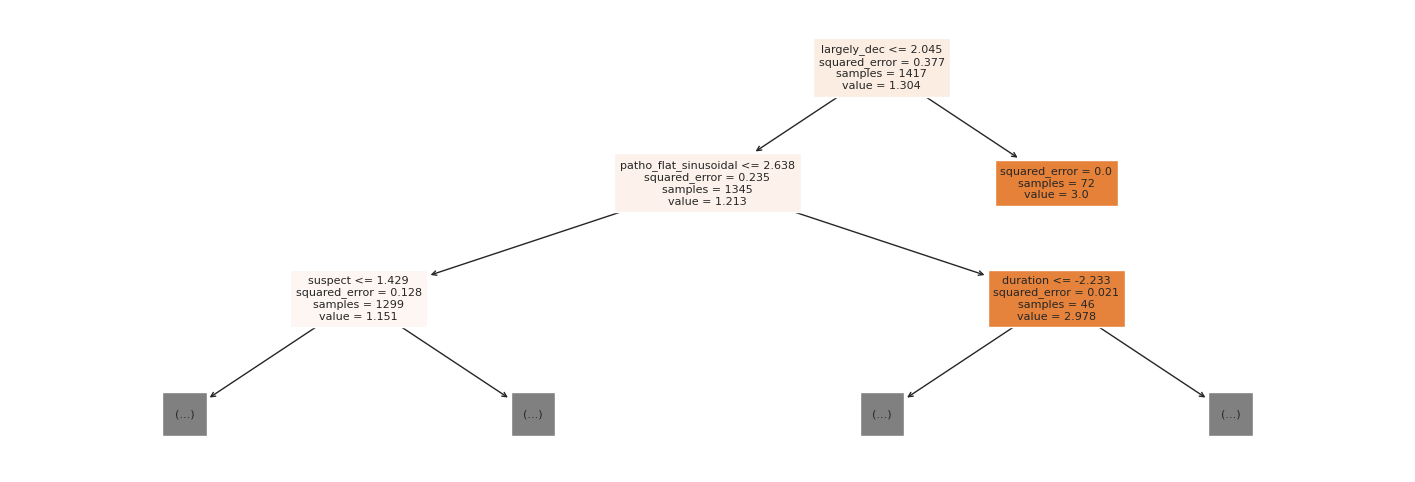

In [126]:
plt.figure(figsize=(18, 6))
plot_tree(dtc, feature_names=X.columns, max_depth=2, filled=True, fontsize=8);

#### Boosting iper parametri

Una volta che abbiamo realizzato il nostro albero possiamo provare a migliorare lo `score`, attraverso un **boosting** dei suoi *iper parametri*, in particolare andremo a testare i parametri:
* `max_depth`
* `min_samples_split`
* `min_samples_leaf`

In [127]:
dt_params = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Crea un oggetto Random Forest e un oggetto Grid Search
dfc = DecisionTreeClassifier(random_state=1926)
gscv = boosting_hyperparameters(classifier=dfc, params=dt_params, X_boosting=None, y_boosting=None, name="Decision Tree")


             Migliori iperparametri per Decision Tree : {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Punteggio medio di cross-validation per Decision Tree :       0.9873
 



Con i `DecisionTreeResgressor` otteniamo come valore migliore di *score* 0.98, superiore rispetto al modello precedente. Proviamo ora ad utilizzare modelli più potenti e performanti come `XGBoost` e `CatBoost`. 

### XGBoost

Come prima cosa importiamo la classe `XGBRegressor`.

In [128]:
from xgboost import XGBRegressor, XGBClassifier

Dal momento in cui `XGBoost` ancora non è in grado di supportare le variabili categoriche abbiamo l'obbligo di utilizzare solamente le variabili numeriche.  Questo potrebbe quindi essere una causa di un **peggioramento** delle performance rispetto agli altri modelli.


Andiamo quindi a prelevare da `X` solamente le variabili *numeriche*, in questo modo non andremo generare eccezioni. 

In [129]:
X_xgbtrain, X_xgbtest, y_xgbtrain, y_xgbtest = train_test_split(X[num_vars_low], y, test_size=1/3, stratify=y,random_state=1926)

Ora che abbiamo suddiviso il dataset e abbiamo creato le variabili per il *training* e il *testing*, possiamo inizializzare il modello `XGBRegressor`, impostando i seguenti *iper parametri*:
* `objective`, specifica la funzione obiettivo da ottimizzare
* `reg_alpha`, utilizzato per la regolarizzazione L1
* `reg_lambda`, utilizzato per la regolarizzazione L2
* `n_estimators`, indica il numero di sotto alberi da addestrare

In [130]:
xgbm = XGBRegressor(objective='reg:squarederror',reg_alpha=0.0, reg_lambda=1.0, n_estimators=200, verbose_eval=True)

Adesso che abbiamo impostato il nostro regressor, passiamo a costruire una `Pipeline`, in cui useremo uno `StandardScaler` per le variabili numeriche. 

In [131]:
xgbm_model = Pipeline([
    ("std_scaler", StandardScaler()),
    ("xgbm", xgbm)
])

Addestriamo e valutiamo il nostro modello.

In [132]:
fit_eval_tree(xgbm_model, X_xgbtrain, y_xgbtrain, X_xgbtest, y_xgbtest)

[13:40:46] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose_eval" } are not used.

      MSE:       0.0585
R-squared:       0.8452
    RMSPE:       0.1625


Da come si può notare dal risultato sovrastante, abbiamo un valore di $R^2$ pari a 0.87, un valore inferiore rispetto a `RandomForestRegressor` e `DecisionTreeRegressor` **senza boosting** di iper parametri. Diamo un occhio a come vengono pesati i valori. 

In [133]:
pd.Series(xgbm.feature_importances_, index=X[num_vars_low].columns).sort_values(ascending=False)

prolongued_dec            0.274234
mean                      0.227006
pct_short_variability     0.125512
utherine_contract         0.053748
pct_long_variability      0.046834
mean_short_variability    0.037659
variability_diff          0.033483
heart_acc                 0.031382
mode                      0.030597
max                       0.030073
contract_move_ratio       0.019472
min                       0.018103
median                    0.015496
duration                  0.010204
nmax                      0.008313
nzeros                    0.006994
dec_duration_ratio        0.006796
foetal_move               0.006599
mean_long_variability     0.006278
variance                  0.004984
medical_baseline          0.002984
width                     0.001829
light_dec                 0.001123
severe_dec                0.000298
repetitive_dec            0.000000
dtype: float32

Nel caso di `XGBoost` il parametro che viene pesato maggiormente è la colonna `prolongued_dec`, mentre solamente una colonna viene pesate con un valore pari a 0.

#### Boosting iper parametri
Dal momento in cui che `XGBoost` ottiene valori peggiori rispetto ai modelli precedenti, proviamo a trovare il valore migliore per alcuni dei suoi *iper 
parametri*, scegliamo in particolare:
* `n_estimators`
* `max_depth`
* `learning_rate`

Da notare che passiamo valori specifici di `X_train` e `y_train`, dal momento in cui possiamo utilizzare solamente variabili numeriche.  

In [134]:
xgb_model = XGBClassifier()
y_boosting = np.subtract(y_xgbtrain, 1)
# Define the hyperparameters grid for grid search
params_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

gscv = boosting_hyperparameters(classifier=xgb_model, params=params_grid, X_boosting=X_xgbtrain,  y_boosting=y_boosting, name="XGBoost")

             Migliori iperparametri per XGBoost : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Punteggio medio di cross-validation per XGBoost :       0.9428
 



Dopo aver effettuato un **boosting**, otteniamo come valore ottimo 0.94, un valore inferiore rispetto ai modelli precedenti, ma va ricordato che **non** sono state utilizzate le variabili categoriche all'interno del dataframe. 

### CatBoosting

In [135]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Come ultimo modello andiamo a testare `CatBoostRegressor`, un modello meno performante di `XGBoost` ma con l'unica differenza che *CatBoost* riesce a gestire le variabile categoriche. 

In [136]:
from catboost import CatBoostRegressor, CatBoostClassifier
print(f" Le variabili categoriche all'interno del nostro modello sono: {cat_vars_low}")

 Le variabili categoriche all'interno del nostro modello sono: ['nsp', 'tendency']


Inizializziamo il modello, andando a specificare il `random_state` , inoltre specifichiamo anche quali sono le variabili categoriche, attraverso il parametro `cat_features`. 

In [137]:
catbm = CatBoostRegressor(n_estimators=1926, cat_features=['tendency'], verbose=0)

Ora che abbiamo inizializzato la nostra classe, possiamo addestrare e successivamente validare il nostro modello.

In [138]:
fit_eval_tree(catbm, X_train, y_train, X_test, y_test)

      MSE:       0.0109
R-squared:       0.9713
    RMSPE:       0.0713


Da come si può notare il nostro valore di $R^2$ tocca gia un valore di circa 0.97 senza aver eseguisto un **boosting** degli iper parametri. Guardiamo in che modo vengono pesate le features.

In [139]:
pd.Series(catbm.feature_importances_, index=X.columns).sort_values(ascending=False)

largely_dec               43.963075
patho_flat_sinusoidal     22.153443
suspect                   14.586334
e                          6.770486
mean_short_variability     2.968649
calm_sleep                 1.809258
variability_diff           0.867001
pct_short_variability      0.664609
heart_acc                  0.629367
pct_long_variability       0.626030
dec_duration_ratio         0.607146
prolongued_dec             0.509716
width                      0.363699
dec_pattern_vagal          0.362960
max                        0.360138
medical_baseline           0.320730
mean_long_variability      0.319122
utherine_contract          0.305418
nmax                       0.280206
duration                   0.230924
foetal_move                0.216669
min                        0.193430
variance                   0.182718
mode                       0.182400
mean                       0.147178
contract_move_ratio        0.093438
light_dec                  0.081843
median                     0

In questo caso invece, la variabile che viene maggiormente pesata è `largely_dec` come nei primi due modelli iniziali. Proviamo ad osservare la struttura dell'albero appena realizzato.

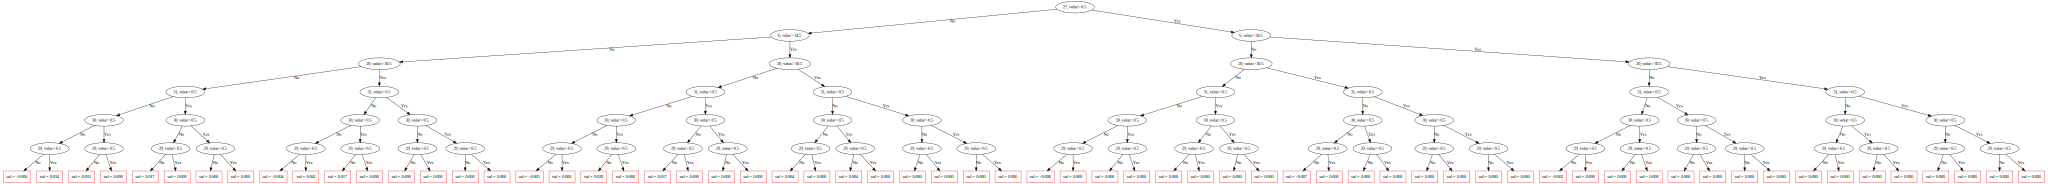

In [140]:
catbm.plot_tree(tree_idx=0)

#### Boosting iper parametri

Proviamo a vedere ora se riusciamo ad ottenre un valore ancora migliore attraverso un **boosting**, in particolare andiamo a toccare:
* `learning_rate`
* `depth`
* `iterations`

In [141]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'depth': [3, 5, 7],
    'iterations': [100, 500, 1000]
}
cbmc = CatBoostClassifier(verbose=0)

gscv = boosting_hyperparameters(classifier=cbmc, params=params_grid, X_boosting=None,  y_boosting=None, name="CatBoost") 

             Migliori iperparametri per CatBoost : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Punteggio medio di cross-validation per CatBoost :       0.9873
 



In questo caso il valore che otteniamo dopo il **boosting** arriva a sfiorare un valore vicino a 0.99, toccando quasi la "perfezione" risultando quindi il migliore tra i modelli precedenti. Proviamo ora invece a sviluppare dei modelli di *classificazione*. 

### Modelli di Classificazione
Per i modelli di classificazione, per mantenere il numero delle classi di `NSP` costanti all'interno di ogni fold, è necessario utilizzare una `StratifiedKFold`.


In [142]:
skf = StratifiedKFold(3, shuffle=True, random_state=1926)

Aggiungiamo questa linea di codice per evitare che gli output si riempiano di `FeatureWarning`

In [143]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

A questo punto possiamo definire una funzione per poter agevolmente calcolare i risultati della Cross Validation di modelli di classificazione.

In [144]:
def grid_search_class(model, grid, X_train, y_train, cv=skf):
    gs = GridSearchCV(model, grid, cv=cv)
    gs.fit(X_train, y_train)
    return (
        gs,
        pd.DataFrame(gs.cv_results_).sort_values('mean_test_score', ascending=False).head()
    )

##### Classificazione Lineare
Inizialmente testiamo un modello di classificazione molto semplice di classificazione Lineare, avvalendoci dell'algoritmo di apprendimento `Perceptron`.

In [145]:
from sklearn.linear_model import Perceptron
model = Perceptron(random_state=1926)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8265162200282088

Per i modelli di classificazione, è importante adottare misurazioni differenti. In questo caso è interessante controllare lo stato della **_Confusion Matrix_**, e per la valutazione possiamo usare `f1_score`, ovvero la media armonica tra le misure `recall` e `precision`, entrambe misure ricavate dall'accuratezza di predizioni di classe dalla *confusion matrix*.

In [146]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

labels = { 1: 'Normal', 2: 'Suspect', 3: 'Pathological' }

def get_confusion_matrix(model, y_true, y_pred, normalize=None):
    cm = pd.DataFrame(
        confusion_matrix(y_true, y_pred, normalize=normalize),
        index=model.classes_, columns=model.classes_
    )

    cm.index = [ labels[i] for i in cm.index ]
    cm.columns = [ labels[i] for i in cm.columns ]
    return cm

def get_percentage_cm(cm: pd.DataFrame)-> pd.DataFrame:
    return (cm * 100).round(2).astype(str) + '%'

def get_coefficients_frame(gs, idx):
    return pd.DataFrame(
        {
            "Normal": gs.best_estimator_['regr'].coef_[0],
            "Suspect": gs.best_estimator_['regr'].coef_[1],
            "Pathological": gs.best_estimator_['regr'].coef_[2],
        }, index=idx
    )

def print_f1_score(score):
    print(f"F1 Score: {score:5.4f}")

def get_f1_score(model, y_test, X_test):
    return f1_score(y_test, model.predict(X_test), average='macro')

In [147]:
get_confusion_matrix(model, y_test, model.predict(X_test))

,Normal,Suspect,Pathological
Normal,530,1,21
Suspect,72,5,21
Pathological,7,1,51


In [148]:
print_f1_score(get_f1_score(model, y_test, X_test))

F1 Score: 0.5598


La *confusion matrix* rispecchia la conformazione del dataset, ovvero che lo sbilanciamento delle classi di `NSP` porta inevitabilmente ad uno squilibrio nella predizione di classi. In questo caso, il modello `Perceptron` per sopperire allo sbilianciamento di record con classi `Suspect` e `Patological`, mostra risultati perggiori nella classe `Normal` e una piuttosto forte inclinazione verso `Pathological`.

Potrebbe essere più d'aiuto visualizzare i dati in percentuale.


In [149]:
cm_perc = get_percentage_cm(
    get_confusion_matrix(model, y_test, model.predict(X_test), normalize='true'))

cm_perc

,Normal,Suspect,Pathological
Normal,96.01%,0.18%,3.8%
Suspect,73.47%,5.1%,21.43%
Pathological,11.86%,1.69%,86.44%


Proviamo ora ad effettuare una Grid Search per individuare i migliori iperparametri. In particolare, `Perceptron`:
- Utilizza una funzione di regolarizzazione (`penalty`) variabile tra:
  - `l1`
  - `l2`
  - `elasticnet`
    - tramite `l1_ratio` si gestisce il peso della regolarizzazione l1.
- Specifcare il parametro `alpha` delle regolarizzazioni
- `fit_intercept`

Effettuiamo anche valutazioni sull'utilizzo di filtri per la normalizzazione dei dati attraverso `StandardScale` e `MinMaxScaler`, oppure nessuno.

In [150]:
perc = Pipeline([
    ('scale', None),
    ('regr', Perceptron(random_state=1926))
])

grid = [
    {
        'scale': [None, StandardScaler(), MinMaxScaler()],
        'regr__penalty': ['l1', 'l2'],
        'regr__alpha': np.logspace(-5, 3, 9),
        'regr__fit_intercept': [False, True],
    },
    {
        'scale': [None, StandardScaler(), MinMaxScaler()],
        'regr__penalty': ['elasticnet'],
        'regr__alpha': np.logspace(-5, 3, 9),
        'regr__l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'regr__fit_intercept': [False, True],
    },
    {
        'scale': [None, StandardScaler(), MinMaxScaler()],
        'regr__penalty': [None]
    }
]

gs, result = grid_search_class(perc, grid, X_train, y_train)

I migliori parametri trovati sono

In [151]:
result.iloc[0]['params']

{'regr__alpha': 0.0001,
 'regr__fit_intercept': True,
 'regr__l1_ratio': 0.6,
 'regr__penalty': 'elasticnet',
 'scale': MinMaxScaler()}

Utilizzando `elasticnet` con `l1_ratio` pari a 0.6, significa che è stata utilizzata anche al regolarizzazione Lasso, la quale può aver eliminato le features meno importanti.

In [152]:
gs.best_estimator_['regr'].coef_
get_coefficients_frame(gs, X.columns)

,Normal,Suspect,Pathological
medical_baseline,-3.945333,1.695911,0.962950
heart_acc,2.322599,-2.624259,0.000000
foetal_move,-3.164957,1.924480,0.000000
utherine_contract,0.854274,-0.220634,-0.088051
pct_short_variability,-3.043443,1.654752,0.000000
mean_short_variability,1.059729,0.000000,0.000000
pct_long_variability,-3.375286,2.805486,1.623886
mean_long_variability,-0.317047,0.000000,0.000000
light_dec,3.079406,-4.208440,0.000000
severe_dec,0.000000,0.000000,0.000000


Notiamo come, siccome è stata scelta nel modello migliore la regolarizzazione `l1`, alcune features si sono azzerate, specialemte per quanto riguarda la predizione della classe `Pathological`. Attraverso questa classe, possiamo anche notare come delle 4 variabili che abbiamo aggiunto in fase di *feature enginee* Questa scelta di parametri ha portato ad un *confusion matrix*:

In [153]:
cm = get_confusion_matrix(gs, y_test, gs.predict(X_test), normalize='true')
get_percentage_cm(cm)

,Normal,Suspect,Pathological
Normal,99.82%,0.18%,0.0%
Suspect,7.14%,92.86%,0.0%
Pathological,0.0%,1.69%,98.31%


In [154]:
print_f1_score(get_f1_score(gs, y_test, X_test))

F1 Score: 0.9790


Notiamo subito che:
- I risultati per la classe `Normal` sono migliorati notevolmente: i parametri sono stati pesati in modo tale da redistribuire i pesi e premiare la predizione della classe `Normal`.
- I risultati per classe `Suspect` sono invece migliorati, ma rimanendo poco più bassi rispetto alle altre classi. Questo ci può far pensare che per via dei miglioramenti nelle altre categorie, gli individui sospetti risultano ora più difficili da individuare. Questo può essere notato anche nei diversi pesi utilizzati per i coefficienti $\mathbf{w}$ del modello individuato, dove per esempio, la feature `pct_long_variability` assume in valore assoluto un valore molto alto, ma nelle due classi ha segno opposto.
- I risultati per la classe `Pathological` sono invece nettamente migliorati, rendendo il modello pressoché infallibile nel creare un falso `Pathological`, e avere una percentuale più del 98% nella predizione di un soggetto patologoico; tutto questo nonostante i dati per quest'ultima categoria sono molto limitati.

Testiamo ora un modello di **regressione logistica**, il quale si basa sulla probabilità di appartenenza di una classe per ogni istanza del training set. Di default viene utilizzata la regolarizzazione `l1`, e oltre ad impostare il *random_state*, impostiamo anche 

In [155]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=1926, solver='saga')

model.fit(X_train, y_train)

LogisticRegression(random_state=1926, solver='saga')

In [156]:
get_percentage_cm(
    get_confusion_matrix(model, y_test, model.predict(X_test), normalize='true'))

,Normal,Suspect,Pathological
Normal,96.92%,2.72%,0.36%
Suspect,69.39%,30.61%,0.0%
Pathological,27.12%,30.51%,42.37%


È interessante notare come, similmente al modello precedente, la mal predizione di un soggetto patologico in un soggetto normale o sospetto è pressochè nulla (terza colonna, prime due righe), mentre in questo modello di regressione logistica, le accuratetzze sui casi sospetti e patologici sono scese drasticamente.

Procediamo ad effettuare *tuning* degli iperparametri del modello

In [157]:
log_reg = Pipeline([
    ('scale', None),
    ('regr', LogisticRegression(solver='saga', random_state=1926, ))
])

grid = [
    {
        'scale': [None, StandardScaler(), MinMaxScaler()],
        'regr__penalty': ['l1', 'l2'],
        'regr__C': np.logspace(-5, 3, 9),
        'regr__fit_intercept': [False, True],
    },
    {
        'scale': [None, StandardScaler(), MinMaxScaler()],
        'regr__penalty': ['elasticnet'],
        'regr__C': np.logspace(-5, 3, 9),
        'regr__l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'regr__fit_intercept': [False, True],
    },
    {
        'scale': [None, StandardScaler(), MinMaxScaler()],
        'regr__penalty': [None]
    }
]

gs, score = grid_search_class(log_reg, grid, X_train, y_train)

In [158]:
score.iloc[0]['params']

{'regr__C': 10.0,
 'regr__fit_intercept': False,
 'regr__l1_ratio': 0.4,
 'regr__penalty': 'elasticnet',
 'scale': StandardScaler()}

È risultato più efficiente un mix di regolarizzazione Ridge e Lasso al 40%, risultando nel calcolo dei seguenti pesi:

In [159]:
get_coefficients_frame(gs, X.columns)

,Normal,Suspect,Pathological
medical_baseline,-0.664650,0.304201,0.360449
heart_acc,0.182538,-0.287722,0.105184
foetal_move,-0.136188,0.161539,-0.025352
utherine_contract,0.201103,-0.123250,-0.077853
pct_short_variability,-0.268771,0.360403,-0.091632
mean_short_variability,0.049963,-0.059864,0.009901
pct_long_variability,-0.702271,0.474462,0.227809
mean_long_variability,0.001286,-0.085976,0.084690
light_dec,0.320352,-0.495106,0.174754
severe_dec,-0.726625,0.279503,0.447122


È da subito evidente come il non utilizzo di una regolarizzazione Lasso pura abbia portato all'azzeramento di molte meno variabili.

In [160]:
get_percentage_cm(
    get_confusion_matrix(gs, y_test, gs.predict(X_test), normalize='true')
)

,Normal,Suspect,Pathological
Normal,99.28%,0.72%,0.0%
Suspect,6.12%,93.88%,0.0%
Pathological,0.0%,1.69%,98.31%


In [161]:
print_f1_score(get_f1_score(gs, y_test, X_test))

F1 Score: 0.9753
